In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


In [165]:
data = pd.read_csv('/content/drive/MyDrive/Assesment/student_lifestyle_dataset.csv')

In [166]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [167]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None


In [168]:
print(data.describe())

        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.5

In [169]:
print(data.describe())
print(data.isnull().sum())  # Check for missing values

        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.5

In [170]:
data.dropna(inplace=True)

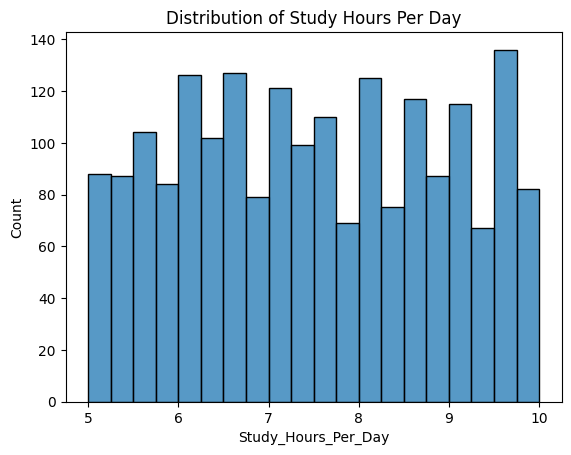

In [171]:
sns.histplot(data['Study_Hours_Per_Day'], bins=20)
plt.title('Distribution of Study Hours Per Day')
plt.show()

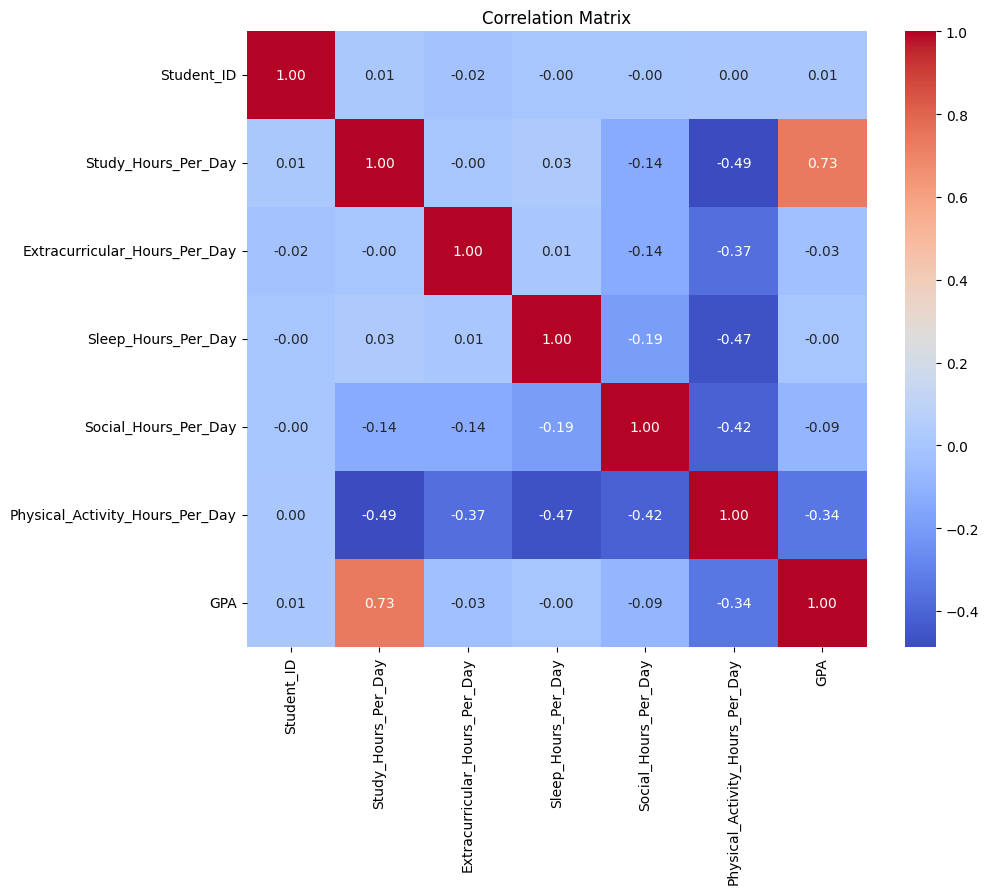

In [172]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [173]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Stress_Level'
label_encoder = LabelEncoder()
data['Stress_Level'] = label_encoder.fit_transform(data['Stress_Level'])

In [174]:
# Define features and target variable
X = data.drop(['Student_ID', 'Stress_Level'], axis=1)  # Drop Student_ID and target column
y = data['Stress_Level']  # Target variable

In [161]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [175]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000, class_weight=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.class_weight = class_weight
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Calculate class weights if provided
        if self.class_weight is not None:
            class_weights = {0: 1, 1: 1}  # Default weights
            for cls in np.unique(y):
                class_weights[cls] = self.class_weight.get(cls, 1)

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            if self.class_weight is not None:
                # Adjust gradients based on class weights
                dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y) * np.array([class_weights[int(label)] for label in y]))
            else:
                dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))

            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)


In [176]:
# Create an instance of the model with class weights
class_weights = {0: 1, 1: 1}  # Adjust these weights based on your class distribution
model_with_weights = LogisticRegressionScratch(learning_rate=0.01, num_iterations=1000, class_weight=class_weights)

# Train the model
model_with_weights.fit(X_train_scaled, y_train.values)

# Predictions
predictions = model_with_weights.predict(X_test_scaled)

In [177]:
print(data['Stress_Level'].value_counts())

Stress_Level
0    1029
2     674
1     297
Name: count, dtype: int64


In [178]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, predictions, average='weighted')        # Use 'weighted' for multi-class
f1 = f1_score(y_test, predictions, average='weighted')                # Use 'weighted' for multi-class

# Print the results
print("Logistic Regression with Class Weights Metrics:")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Logistic Regression with Class Weights Metrics:
Accuracy: 47.50%
Precision: 0.53
Recall: 0.47
F1 Score: 0.44


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [188]:
# 1. Hyperparameters for Logistic Regression
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'max_iter': [100, 200, 300]     # Number of iterations
}

# Create a GridSearchCV object for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                                     param_grid=logistic_param_grid,
                                     cv=5,
                                     scoring='f1_weighted',
                                     n_jobs=-1)

# Fit the grid search to the data
logistic_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score for Logistic Regression
print("Best Parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best F1 Score for Logistic Regression:", logistic_grid_search.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100}
Best F1 Score for Logistic Regression: 0.8174149129756352


In [179]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
# 2. Random Forest Classifier Model
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=100)

In [184]:
# Predictions for Random Forest
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [185]:
print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')


Random Forest Metrics:
Accuracy: 51.50%
Precision: 0.27
Recall: 0.52
F1 Score: 0.35


In [205]:
# 2. Rebuild the Random Forest model with selected features
# Define the parameter grid for Random Forest with stricter limits
rf_param_grid = {
    'n_estimators': [50, 100],                # Fewer trees
    'max_depth': [5, 10, 15],                 # Limit maximum depth
    'min_samples_split': [5, 10],             # Increase minimum samples to split
    'min_samples_leaf': [2, 5],               # Increase minimum samples at leaf
    'max_features': ['sqrt']                   # Use square root of features
}

# Create a GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                               param_grid=rf_param_grid,
                               cv=5,
                               scoring='f1_weighted',
                               n_jobs=-1)

# Fit the grid search to the training data with selected features
X_train_selected = X_train_scaled[:, feature_importance_df.head(top_n).index]
X_test_selected = X_test_scaled[:, feature_importance_df.head(top_n).index]
rf_grid_search.fit(X_train_selected, y_train)

# Best parameters and best score for Random Forest
best_rf_model = rf_grid_search.best_estimator_
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best F1 Score for Random Forest:", rf_grid_search.best_score_)

# Predictions for the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_selected)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print Random Forest Metrics
print("\nRandom Forest Test Metrics:")
print(f'Accuracy: {accuracy_rf * 100:.2f}%')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')


Best Parameters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best F1 Score for Random Forest: 1.0

Random Forest Test Metrics:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [190]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[206,   0,   0],
       [ 67,   0,   0],
       [127,   0,   0]])

In [193]:
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,0


In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train_scaled, y_train)

# 3. Build and train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# 4. Evaluate KNN model
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print KNN Metrics
print("KNN Test Metrics:")
print(f'Accuracy: {accuracy_knn * 100:.2f}%')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1 Score: {f1_knn:.2f}')

y_pred_knn_train = knn_model.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
precision_knn_train = precision_score(y_train, y_pred_knn_train, average='weighted')
recall_knn_train = recall_score(y_train, y_pred_knn_train, average='weighted')
f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')

print("\nKNN Training Metrics:")
print(f'Accuracy: {accuracy_knn_train * 100:.2f}%')
print(f'Precision: {precision_knn_train:.2f}')
print(f'Recall: {recall_knn_train:.2f}')
print(f'F1 Score: {f1_knn_train:.2f}')


KNN Test Metrics:
Accuracy: 89.50%
Precision: 0.89
Recall: 0.90
F1 Score: 0.89

KNN Training Metrics:
Accuracy: 94.00%
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [211]:
# Hyperparameters for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a GridSearchCV object for KNN
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=knn_param_grid,
                                cv=5,
                                scoring='f1_weighted',
                                n_jobs=-1)

# Fit the grid search to the data
knn_grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score for KNN
best_knn_model = knn_grid_search.best_estimator_
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best F1 Score for KNN:", knn_grid_search.best_score_)

# Evaluate the best KNN model on the test set
y_pred_knn = best_knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print KNN Metrics
print("\nKNN Test Metrics:")
print(f'Accuracy: {accuracy_knn * 100:.2f}%')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1 Score: {f1_knn:.2f}')

y_pred_knn_train = best_knn_model.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
precision_knn_train = precision_score(y_train, y_pred_knn_train, average='weighted')
recall_knn_train = recall_score(y_train, y_pred_knn_train, average='weighted')
f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')

# Print KNN Training Metrics
print("\nKNN Training Metrics:")
print(f'Accuracy: {accuracy_knn_train * 100:.2f}%')
print(f'Precision: {precision_knn_train:.2f}')
print(f'Recall: {recall_knn_train:.2f}')
print(f'F1 Score: {f1_knn_train:.2f}')

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best F1 Score for KNN: 0.9097303148434633

KNN Test Metrics:
Accuracy: 91.00%
Precision: 0.91
Recall: 0.91
F1 Score: 0.91

KNN Training Metrics:
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [201]:
from sklearn.feature_selection import RFE

In [213]:
# 3. Rebuild the KNN model with selected features
knn_model = KNeighborsClassifier(n_neighbors=5)  # Use the optimal n_neighbors found earlier
knn_model.fit(X_train_selected, y_train)

# Predictions and evaluation for KNN
y_pred_knn = knn_model.predict(X_test_selected)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print KNN Metrics
print("\nKNN Test Metrics with Selected Features:")
print(f'Accuracy: {accuracy_knn * 100:.2f}%')
print(f'Precision: {precision_knn:.2f}')
print(f'Recall: {recall_knn:.2f}')
print(f'F1 Score: {f1_knn:.2f}')

y_pred_knn_train = knn_model.predict(X_train_selected)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
precision_knn_train = precision_score(y_train, y_pred_knn_train, average='weighted')
recall_knn_train = recall_score(y_train, y_pred_knn_train, average='weighted')
f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')

# Print KNN Metrics for training data
print("\nKNN Training Metrics with Selected Features:")
print(f'Accuracy: {accuracy_knn_train * 100:.2f}%')
print(f'Precision: {precision_knn_train:.2f}')
print(f'Recall: {recall_knn_train:.2f}')
print(f'F1 Score: {f1_knn_train:.2f}')



KNN Test Metrics with Selected Features:
Accuracy: 92.00%
Precision: 0.92
Recall: 0.92
F1 Score: 0.92

KNN Training Metrics with Selected Features:
Accuracy: 96.06%
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


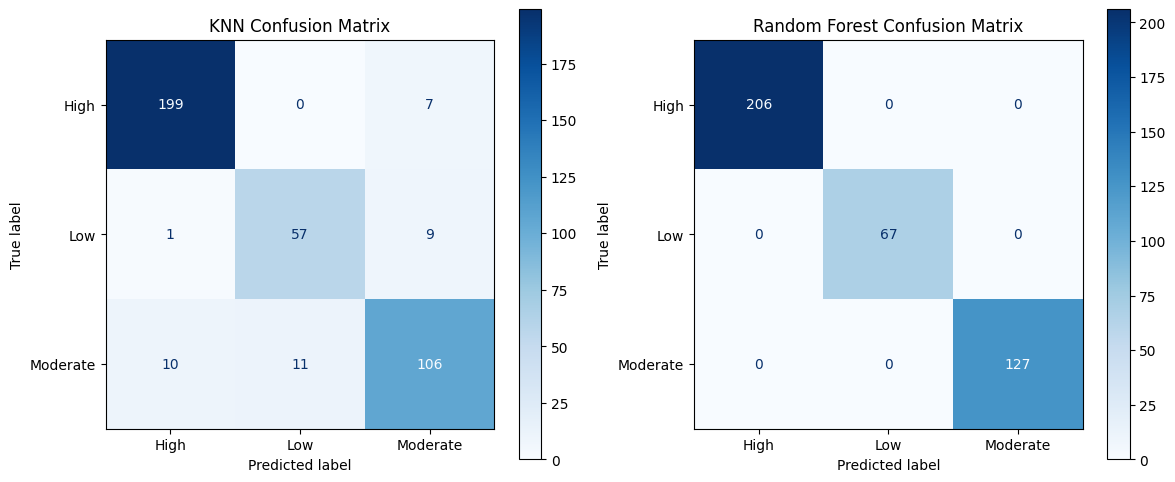

In [226]:
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Generate confusion matrices
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

# 5. Display confusion matrices
plt.figure(figsize=(12, 5))

# KNN Confusion Matrix
plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_knn, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('KNN Confusion Matrix')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_rf, display_labels=label_encoder.classes_).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

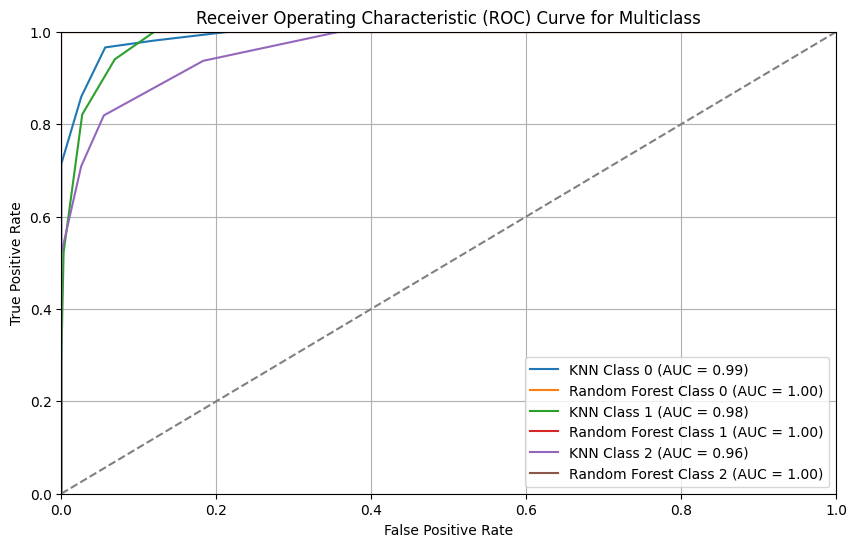

In [227]:
# 1. Build and train KNN model
knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))  # You can adjust n_neighbors
knn_model.fit(X_train_scaled, y_train)

# 2. Build and train Random Forest model
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=0))  # You can adjust n_estimators
rf_model.fit(X_train_scaled, y_train)

# 3. Get predicted probabilities for ROC curve
y_pred_knn_proba = knn_model.predict_proba(X_test_scaled)  # Probabilities for all classes
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)  # Probabilities for all classes

# 4. Calculate ROC curve and AUC for each class for KNN
n_classes = len(np.unique(y_train))
fpr_knn = {}
tpr_knn = {}
roc_auc_knn = {}

for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test == i, y_pred_knn_proba[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# 5. Calculate ROC curve and AUC for each class for Random Forest
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}

for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test == i, y_pred_rf_proba[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# 6. Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label='KNN Class {} (AUC = {:.2f})'.format(i, roc_auc_knn[i]))
    plt.plot(fpr_rf[i], tpr_rf[i], label='Random Forest Class {} (AUC = {:.2f})'.format(i, roc_auc_rf[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()